***

# GRANDLIB environment configuration


## With Docker


Docker is the best choice for Mac OS. Note image version depends on [processor architecture](https://hub.docker.com/r/grandlib/dev):

* ARM64: for M1, M2 version 2.0
* AMD64 : version 1.2

See github [wiki](https://github.com/grand-mother/grand/wiki) of grand project
  

## With Conda 

Conda envionment is the best choice for linux.

See [conda fir GRANDLIB](https://github.com/grand-mother/grand/blob/master/env/readme.md)


# ROOT File structure:

Link to reference docuement/wiki to add

## Data example

Examples of ROOT file are is stored in grand/sim2root/Common/sim_Xiaodushan_20221026_1200_1_SIBYLL23d_GP300_1618.

Each ROOT file contents only one TTree, last version could hold several.


# Simulation detector : Efield to Voltage


## Script simulation of detector 

`convert_efield2voltage.py` is stored in grand/script directory, after setup of the package it add in PATH environment variable


## Documentation

The documentation is given by --help option

```bash
$ convert_efield2voltage.py -h
usage: convert_efield2voltage.py [-h] [--no_noise] [--no_rf_chain] -o OUT_FILE [--verbose {debug,info,warning,error,critical}] [--seed SEED] [--lst LST] [--padding_factor PADDING_FACTOR] [--target_duration_us TARGET_DURATION_US]
                                 [--target_sampling_rate_mhz TARGET_SAMPLING_RATE_MHZ]
                                 file

Calculation of DU response in volt for first event in Efield input file.

positional arguments:
  file                  Efield input data file in GRANDROOT format.

options:
  -h, --help            show this help message and exit
  --no_noise            don't add galactic noise.
  --no_rf_chain         don't add RF chain.
  -o OUT_FILE, --out_file OUT_FILE
                        output file in GRANDROOT format. If the file exists it is overwritten.
  --verbose {debug,info,warning,error,critical}
                        logger verbosity.
  --seed SEED           Fix the random seed to reproduce same galactic noise, must be positive integer
  --lst LST             lst for Local Sideral Time, galactic noise is variable with LST and maximal for 18h for the EW arm.
  --padding_factor PADDING_FACTOR
                        Increase size of signal with zero padding, with 1.2 the size is increased of 20%.
  --target_duration_us TARGET_DURATION_US
                        Adujust (and override) padding factor in order to get a signal of the given duration, in us
  --target_sampling_rate_mhz TARGET_SAMPLING_RATE_MHZ
                        Target sampling rate of the data in Mhz
```

## Example

```bash
$ convert_efield2voltage.py -o volt_leff_only_1000.root --no_noise --no_rf_chain --target_sampling_rate_mhz 1000 sim2root/Common/sim_Xiaodushan_20221026_1200_1_SIBYLL23d_GP300_1618/tefield_1618-1618_L0_0000.root 

6:55:57.266  INFO [grand.manage_log 187] create handler for root logger: ['grand']
16:55:57.266  INFO [grand.scripts.convert_efield2voltage 141] 
16:55:57.266  INFO [grand.scripts.convert_efield2voltage 141] ===========> Begin at 2024-02-06T16:55:57Z <===========
16:55:57.266  INFO [grand.scripts.convert_efield2voltage 141] 
16:55:57.266  INFO [grand.scripts.convert_efield2voltage 141] 
16:55:57.266  INFO [grand.scripts.convert_efield2voltage 144] seed used for random number generator is None.
16:55:57.808  INFO [grand.sim.detector.rf_chain 473] vga gain: 20 dB
16:55:57.809  INFO [grand.sim.detector.antenna_model 103] Loading GP300 antenna model ...
16:55:57.809  INFO [grand.sim.detector.antenna_model 71] Using /home/jcolley/projet/grand_wk/grandlib/grand/data/detector/Light_GP300Antenna_EWarm_leff.npz
16:55:57.931  INFO [grand.sim.detector.antenna_model 71] Using /home/jcolley/projet/grand_wk/grandlib/grand/data/detector/Light_GP300Antenna_SNarm_leff.npz
16:55:58.059  INFO [grand.sim.detector.antenna_model 71] Using /home/jcolley/projet/grand_wk/grandlib/grand/data/detector/Light_GP300Antenna_Zarm_leff.npz
16:55:58.187  INFO [grand.sim.efield2voltage 109] Running on event_number: 1618, run_number: 0
16:55:58.247  INFO [grand.geo.turtle 222] Map constructor add map /home/jcolley/projet/grand_wk/grandlib/grand/data/egm96.png in cache memory 
16:55:58.250  INFO [grand.sim.shower.gen_shower 110] Site origin [lat, long, height]: [[  40.98455811]
16:55:58.250  INFO [grand.sim.shower.gen_shower 110]  [  93.95224762]
16:55:58.250  INFO [grand.sim.shower.gen_shower 110]  [1200.        ]]
16:55:58.250  INFO [grand.sim.shower.gen_shower 112] xmax in shower coordinate: [-4050.65  3988.91  5763.41]
16:55:58.250  INFO [grand.sim.efield2voltage 130] shower origin in Geodetic: [  40.98456   93.95225 1200.     ]
16:55:58.256  INFO [grand.sim.efield2voltage 249] shape du_nanoseconds and t_samples =  (5, 1), (5, 4622)
16:55:58.257  INFO [grand.sim.efield2voltage 165] Electric field lenght is 4622 samples at 2000.0, spanning 2.311 us.
16:55:58.257  INFO [grand.sim.efield2voltage 166] With a padding factor of 1.0 we will take it to 4622 samples, spanning 2.311 us.
16:55:58.257  INFO [grand.sim.efield2voltage 167] However, optimal number of frequency bins to do a fast fft is 2353 giving traces of 4704 samples.
16:55:58.257  INFO [grand.sim.efield2voltage 168] With this we will obtain traces spanning 2.352 us, that we will then truncate if needed to get the requested trace duration.
16:55:58.257  INFO [grand.sim.detector.process_ant 74]  ** Specfic processing when f_in = k * f_out else IndexError **
16:55:58.257  INFO [grand.sim.efield2voltage 314] ==============>  Processing DU with id: 14
16:55:58.260  INFO [grand.sim.efield2voltage 314] ==============>  Processing DU with id: 21
16:55:58.263  INFO [grand.sim.efield2voltage 314] ==============>  Processing DU with id: 27
16:55:58.266  INFO [grand.sim.efield2voltage 314] ==============>  Processing DU with id: 28
16:55:58.268  INFO [grand.sim.efield2voltage 314] ==============>  Processing DU with id: 35
16:55:58.271  INFO [grand.sim.efield2voltage 293] resampling the voltage from 2000.0 to 1000.0 MHz, new trace lenght is 2311 samples
16:55:58.271  INFO [grand.sim.efield2voltage 301] truncating output to 2311 samples
16:55:58.271  INFO [grand.sim.efield2voltage 556] save result in volt_leff_only_1000.root
16:55:58.273 WARNING [grand.dataio.root_trees 568] No valid tvoltage TTree in the file volt_leff_only_1000.root. Creating a new one.
16:55:58.408  INFO [grand.scripts.convert_efield2voltage 158] 
16:55:58.408  INFO [grand.scripts.convert_efield2voltage 158] 
16:55:58.408  INFO [grand.scripts.convert_efield2voltage 158] ===========> End at 2024-02-06T16:55:58Z <===========
16:55:58.408  INFO [grand.scripts.convert_efield2voltage 158] Duration (h:m:s): 0:00:01.142448
```



# Event viewer: ioroot_3dtraces.py

An event viewer for GRANDROOT file format is available in GRANDLIB package, other projects are in progress, like :
* [BROOT](https://github.com/luckyjim/BROOT/blob/main/README.md) for generic ROOT file, useful for quick view, all TBranch value are available whatever the version of GRANDROOT. Can be used for any file in ROOT format.
* [EventViewer](https://github.com/rameshkoirala/EventViewer) by Ramesh Koirala

## ioroot_3dtraces.py

This event viewer script is available in directory `grand/examples/dataio` in PATH. We can see EField ROOT file and also Voltage ROOT file.

## Documentation

The main option is `--footprint` option you obtain an interactive view of the network.

Others option are given by --help 

```bash
$ ioroot_3dtraces.py -h

usage: ioroot_3dtraces.py [-h] [-f] [--time_val] [-t TRACE] [--idx_evt IDX_EVT] [--trace_image] [--list_du] [--list_ttree] [--dump DUMP] [-i] file

Information and plot event/traces for ROOT file

positional arguments:
  file                  path and name of ROOT file GRAND

options:
  -h, --help            show this help message and exit
  -f, --footprint       interactive plot (double click) of footprint, max value for each DU
  --time_val            interactive plot, value of each DU at time t defined by a slider
  -t TRACE, --trace TRACE
                        plot trace x,y,z and power spectrum of detector unit (DU)
  --idx_evt IDX_EVT     Select event with index <idx_evt>, given by -i option, idx_evt is always > 0 or = 0
  --trace_image         interactive image plot (double click) of norm of traces
  --list_du             list of identifier of DU
  --list_ttree          list of TTree present in file
  --dump DUMP           dump trace of DU
  -i, --info            some information about the contents of the file
```

## Plot examples  with option --footprint 

### Footprint plot with maximum by detector

 * Interactive plot, you can click on DU station to open the trace on each axis and also the density power spectrum associated 
 * Surface of network
 * Number of detector unit
 * Axis North, West indicated
 * Maximum value for each DU
 * Name file ROOT, event number and run number value

For simulated event:

 * Distance to core position
 * Azimuth and zenith angle
 * Primary energy

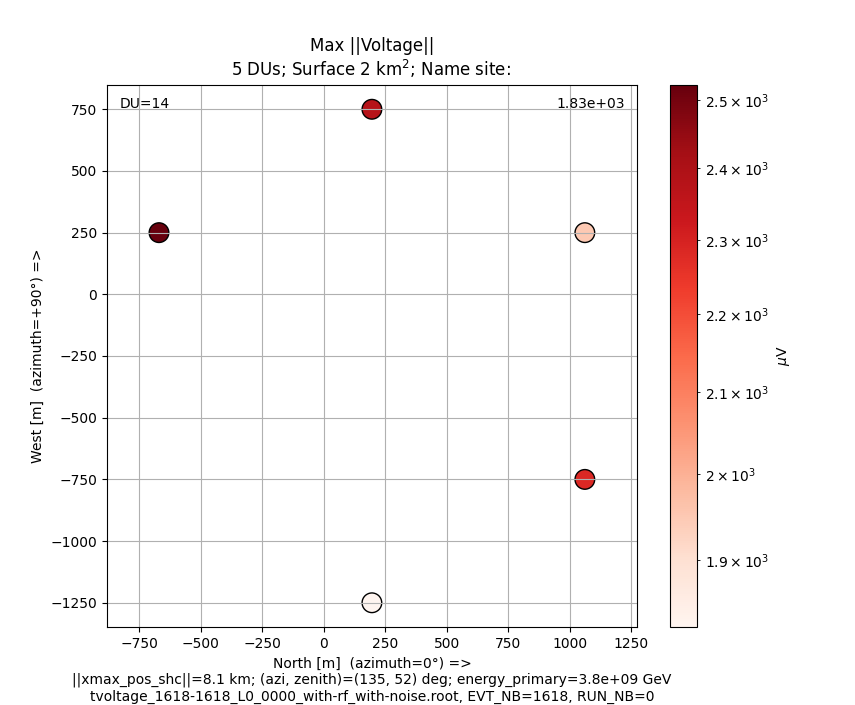

### Trace of detector

* DU identifier and index value
* Frequency sampling
* Number of samples
* Unit and relative time in event
* Estimated noise by antenna
* Maximum value by Hilbert estimator with 3 antennas
* Estimated SNR
* Name file ROOT, event number and run number

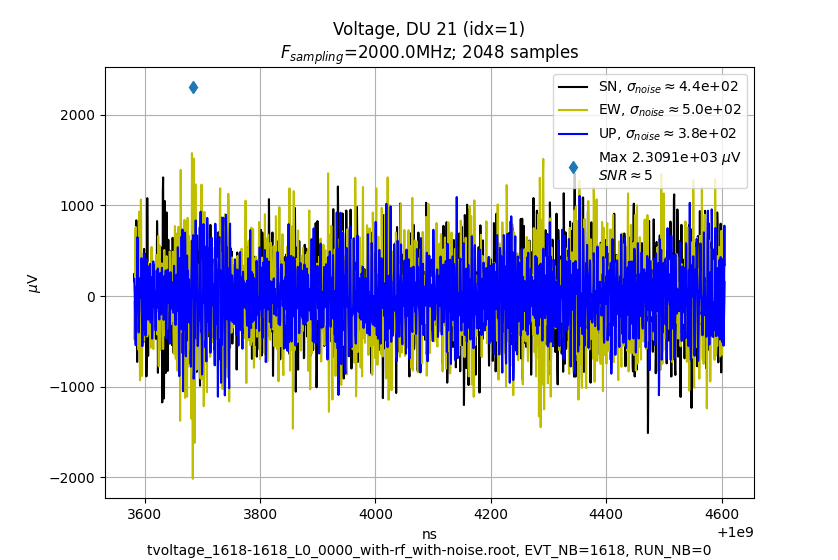

## Implementation

All plots and data available on figure can be produced outside of the script ioroot_3dtraces.py with the class `Handling3dTraces in module` grand/basis/traces_event.py`

See notebook grand/examples/basis/class_Handling3dTraces.ipynb

---

============================== Obsolete ===================================


In [1]:
fv = grf.FileEfield("/home/grand/data/test_efield.root")
fv.traces.shape

NameError: name 'grf' is not defined

In [ ]:
import matplotlib.pyplot as plt

plt.plot(fv.traces[50, 0])

`FileEfield` is a data class without feature to handle traces. You can use `Handling3dTraces()` in grand.basis.traces_event.py to handle traces.

In [ ]:
handle_tr = fv.get_obj_handling3dtraces()
handle_tr.plot_trace_idx(50)

As you can see, this class retrieves the correct unit, the time associated to sample in nanoseconds and allow to use index in array or DU identifier. For example, we can plot trace of DU 7, same plot as above.

In [ ]:
handle_tr.plot_trace_du(7)

You can also, plot footprint with different value

In [ ]:
handle_tr.plot_footprint_time_max()
handle_tr.plot_footprint_val_max()

If you want learn more on this class, read the docstring with help function in ipython or jupyter notebook:
```bash
help(handle_tr)
```

You can use the same technique to plot voltage traces. You have to replace the electric-field file with the voltage file, like `fv = grf.FileEfield("/home/grand/data/test_voltage.root")`
